H2.2 Perceptron Learning Algorithm
==================

Implementation of PLA

In [419]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

### (a) Data processing
N = 100  
Data1 (80/20)  
Data2 (30/70)

In [420]:
def generate_data(n):
    N = int(n / 2)
    mu_n, sig_n = -0.5, 0.5
    mu_p, sig_p = 0.5, 0.5
    x1_p = np.random.normal(mu_n, sig_n, N)
    x2_p = np.random.normal(mu_p, sig_p, N)
    x1_n = np.random.normal(mu_p, sig_p, N)
    x2_n = np.random.normal(mu_n, sig_n, N)
#     x1_p = (np.random.rand(N) * 2 - 1) / 2 - 0.5
#     x2_p = (np.random.rand(N) * 2 - 1) / 2 + 0.5
#     x1_n = (np.random.rand(N) * 2 - 1) / 2 + 0.5
#     x2_n = (np.random.rand(N) * 2 - 1) / 2 - 0.5
    x1 = np.concatenate((x1_p, x1_n))[None]
    x2 = np.concatenate((x2_p, x2_n))[None]
    lp = np.ones(N)
    ln = -np.ones(N)
    label = np.concatenate((lp, ln))[None]
    data = np.concatenate((x1, x2, label))
    return np.transpose(data)

def resample(data, training_rate):
    class_num = int(training_rate * len(data))
    np.random.shuffle(data)
    return data[:class_num, :], data[class_num:, :]


In [421]:
new_data = generate_data(100)
training_data_1, testing_data_1 = resample(new_data, 0.8)
training_data_2, testing_data_2 = resample(new_data, 0.3)


### (b) Implementation

In [422]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return 1. if activation >= 0. else -1.

def train_weights(training_data, l_rate):
    weights = np.zeros(len(training_data[0]))
    for row in training_data:
        prediction = predict(row, weights)
        error = row[-1] - prediction
        weights[0] = weights[0] + l_rate * error
        for i in range(len(row) - 1):
            weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights


### (c) Training

In [423]:
l_rate = 0.5

wd1 = train_weights(training_data_1, l_rate)
wd2 = train_weights(training_data_2, l_rate)


Text(0.5,1,'training data 1 result')

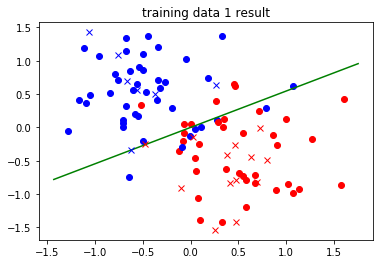

In [424]:
tp1, fp1, tn1, fn1 = 0, 0, 0, 0

for r in training_data_1:
    if r[2] == 1:
        plt.plot(r[0], r[1], 'bo')
    else:
        plt.plot(r[0], r[1], 'ro')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -wd1[1]/wd1[2] * x_vals
plt.plot(x_vals, y_vals, 'g-')

for row in testing_data_1:
    prediction = predict(row, wd1)
    if row[2] == 1:
        plt.plot(row[0], row[1], 'bx')
        if prediction == row[-1]:
            tp1 += 1
        else:
            fn1 += 1
    else:
        plt.plot(row[0], row[1], 'rx')
        if prediction == row[-1]:
            tn1 += 1
        else:
            fp1 += 1

plt.title('training data 1 result')

Blue dots: training data with y = 1  
Red dots: training data with y = -1  
Blue crosses: testing data with y = 1  
Red crosses: tesing data with y = -1

Text(0.5,1,'training data 2 result')

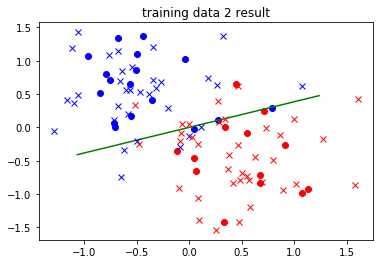

In [425]:
tp2, fp2, tn2, fn2 = 0, 0, 0, 0

for r in training_data_2:
    if r[2] == 1:
        plt.plot(r[0], r[1], 'bo')
    else:
        plt.plot(r[0], r[1], 'ro')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -wd2[1]/wd2[2] * x_vals
plt.plot(x_vals, y_vals, 'g-')
for row in testing_data_2:
    prediction = predict(row, wd2)
    if row[2] == 1:
        plt.plot(row[0], row[1], 'bx')
        if prediction == row[-1]:
            tp2 += 1
        else:
            fn2 += 1
    else:
        plt.plot(row[0], row[1], 'rx')
        if prediction == row[-1]:
            tn2 += 1
        else:
            fp2 += 1

plt.title('training data 2 result')


Blue dots: training data with y = 1  
Red dots: training data with y = -1  
Blue crosses: testing data with y = 1  
Red crosses: tesing data with y = -1

### (d) Testing

In [426]:
print("Data1")
precision_1 = tp1 * 100 / (tp1 + fp1)
recall_1 = tp1 * 100 / (tp1 + fn1)
print("\tPrecision: {0}%".format(precision_1))
print("\tRecall: {0}%".format(recall_1))
print("\tf1-score: {0}%".format(2 * (precision_1 * recall_1) / (precision_1 + recall_1)))

print("Data2")
precision_2 = tp2 * 100 / (tp2 + fp2)
recall_2 = tp2 * 100 / (tp2 + fn2)
print("\tPrecision: {0}%".format(precision_2))
print("\tRecall: {0}%".format(recall_2))
print("\tf1-score: {0}%".format(2 * (precision_2 * recall_2) / (precision_2 + recall_2)))



Data1
	Precision: 100.0%
	Recall: 71.42857142857143%
	f1-score: 83.33333333333333%
Data2
	Precision: 66.0%
	Recall: 100.0%
	f1-score: 79.51807228915662%


### (e) Kernel perceptron

In [427]:
def kernel_perceptron_train(training_data):
    n = len(training_data)
    alpha = np.zeros(n)
    kernel = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            kernel[i, j] = np.dot(training_data[i,:-1], training_data[j,:-1])
    
    for _ in range(3):
        for i in range(n):
            if np.sign(np.sum(kernel[:, i] * alpha * training_data[:,-1])) != training_data[i, -1]:
                alpha[i] += 1.
    
    sv = alpha > 1e-5
    ind = np.arange(len(alpha))[sv]
    alpha = alpha[sv]
    return alpha, training_data[sv, :-1], training_data[sv, -1]

def project(X, A, SV_X, SV_y):
    predictions = np.zeros(len(X))
    for i in range(len(X)):
        s = 0
        for a, sv_X, sv_y in zip(A, SV_X, SV_y):
            s += a * sv_y * np.dot(X[i], sv_X)
        predictions[i] = s
    return predictions

def predict(data, A, SV_X, SV_y):
    X = np.atleast_2d(data[:, :-1])
    return np.sign(project(X, A, SV_X, SV_y))

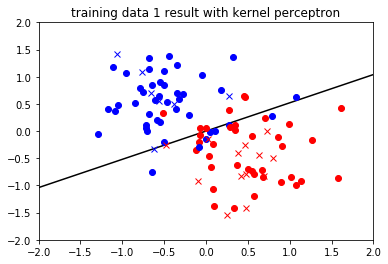

In [428]:
alpha_1, sv_X_1, sv_y_1 = kernel_perceptron_train(training_data_1)
predictions = predict(testing_data_1, alpha_1, sv_X_1, sv_y_1)
for r in training_data_1:
    if r[2] == 1:
        plt.plot(r[0], r[1], 'bo')
    else:
        plt.plot(r[0], r[1], 'ro')

plt.scatter(sv_X_1[:, 0], sv_X_1[:, 1], s=20, c='g')
X1, X2 = np.meshgrid(np.linspace(-2,2,10), np.linspace(-2,2,10))
X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = project(X, alpha_1, sv_X_1, sv_y_1).reshape(X1.shape)
for i in range(len(predictions)):
    if testing_data_1[i, -1] == 1:
        plt.plot(testing_data_1[i, 0], testing_data_1[i, 1], 'bx')
        if predictions[i] == testing_data_1[i, -1]:
            tp1 += 1
        else:
            fn1 += 1
    else:
        plt.plot(testing_data_1[i, 0], testing_data_1[i, 1], 'rx')
        if predictions[i] == testing_data_1[i, -1]:
            tn1 += 1
        else:
            fp1 += 1
plt.contour(X1, X2, Z, [0.0], colors='k', origin='lower')
plt.axis("tight")
plt.title("training data 1 result with kernel perceptron")
plt.show()

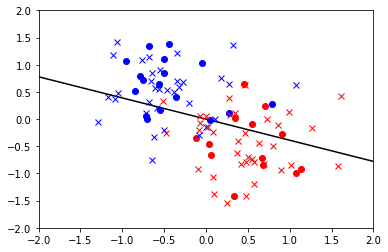

In [429]:
alpha_2, sv_X_2, sv_y_2 = kernel_perceptron_train(training_data_2)
predictions = predict(testing_data_2, alpha_2, sv_X_2, sv_y_2)
for r in training_data_2:
    if r[2] == 1:
        plt.plot(r[0], r[1], 'bo')
    else:
        plt.plot(r[0], r[1], 'ro')

plt.scatter(sv_X_2[:, 0], sv_X_2[:, 1], s=20, c='g')
X1, X2 = np.meshgrid(np.linspace(-2,2,10), np.linspace(-2,2,10))
X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = project(X, alpha_2, sv_X_2, sv_y_2).reshape(X1.shape)
for i in range(len(predictions)):
    if testing_data_2[i, -1] == 1:
        plt.plot(testing_data_2[i, 0], testing_data_2[i, 1], 'bx')
        if predictions[i] == testing_data_2[i, -1]:
            tp2 += 1
        else:
            fn2 += 1
    else:
        plt.plot(testing_data_2[i, 0], testing_data_2[i, 1], 'rx')
        if predictions[i] == testing_data_2[i, -1]:
            tn2 += 1
        else:
            fp2 += 1
plt.contour(X1, X2, Z, [0.0], colors='k', origin='lower')
plt.axis("tight")
plt.show()

In [430]:
print("Data1")
precision_1 = tp1 * 100 / (tp1 + fp1)
recall_1 = tp1 * 100 / (tp1 + fn1)
print("\tPrecision: {0}%".format(precision_1))
print("\tRecall: {0}%".format(recall_1))
print("\tf1-score: {0}%".format(2 * (precision_1 * recall_1) / (precision_1 + recall_1)))

print("Data2")
precision_2 = tp2 * 100 / (tp2 + fp2)
recall_2 = tp2 * 100 / (tp2 + fn2)
print("\tPrecision: {0}%".format(precision_2))
print("\tRecall: {0}%".format(recall_2))
print("\tf1-score: {0}%".format(2 * (precision_2 * recall_2) / (precision_2 + recall_2)))


Data1
	Precision: 100.0%
	Recall: 78.57142857142857%
	f1-score: 88.0%
Data2
	Precision: 65.88235294117646%
	Recall: 84.84848484848484%
	f1-score: 74.17218543046357%
